In [226]:
import pandas as pd
import numpy as np
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values 对缺失值进行可视化展示 

# stats
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, LassoCV,Ridge,RidgeCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestRegressor

#设置jupyter显示多行结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'#默认为'last
c = '#366DE8'


## 1 数据读取

In [227]:
data=pd.read_csv("carPrice_Assignment.csv",na_values = '?')
#打印数据维度
print("Data set size:", data.shape)
print(data.info())
data.head()

Data set size: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 2 数据清洗

### 2-1 缺失值处理

In [228]:
# 去除car_ID列
data.drop(['car_ID'], axis=1, inplace=True)

#整理出数值型特征和类别型特征
all_cols = data.columns.tolist()
numerical_cols = []
categorical_cols = []

for col in all_cols:
    if (data[col].dtype != 'object') :
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print('数值型变量数目为：',len(numerical_cols))
print('类别型变量数目为：',len(categorical_cols))

数值型变量数目为： 15
类别型变量数目为： 10


<Axes: >

数值型和类别型数据缺失值数量为：
 symboling           0.0
enginetype          0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
enginesize          0.0
cylindernumber      0.0
curbweight          0.0
CarName             0.0
carheight           0.0
carwidth            0.0
carlength           0.0
wheelbase           0.0
enginelocation      0.0
drivewheel          0.0
carbody             0.0
doornumber          0.0
aspiration          0.0
fueltype            0.0
price               0.0
dtype: float64
类别型数据缺失值数量为： 0


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


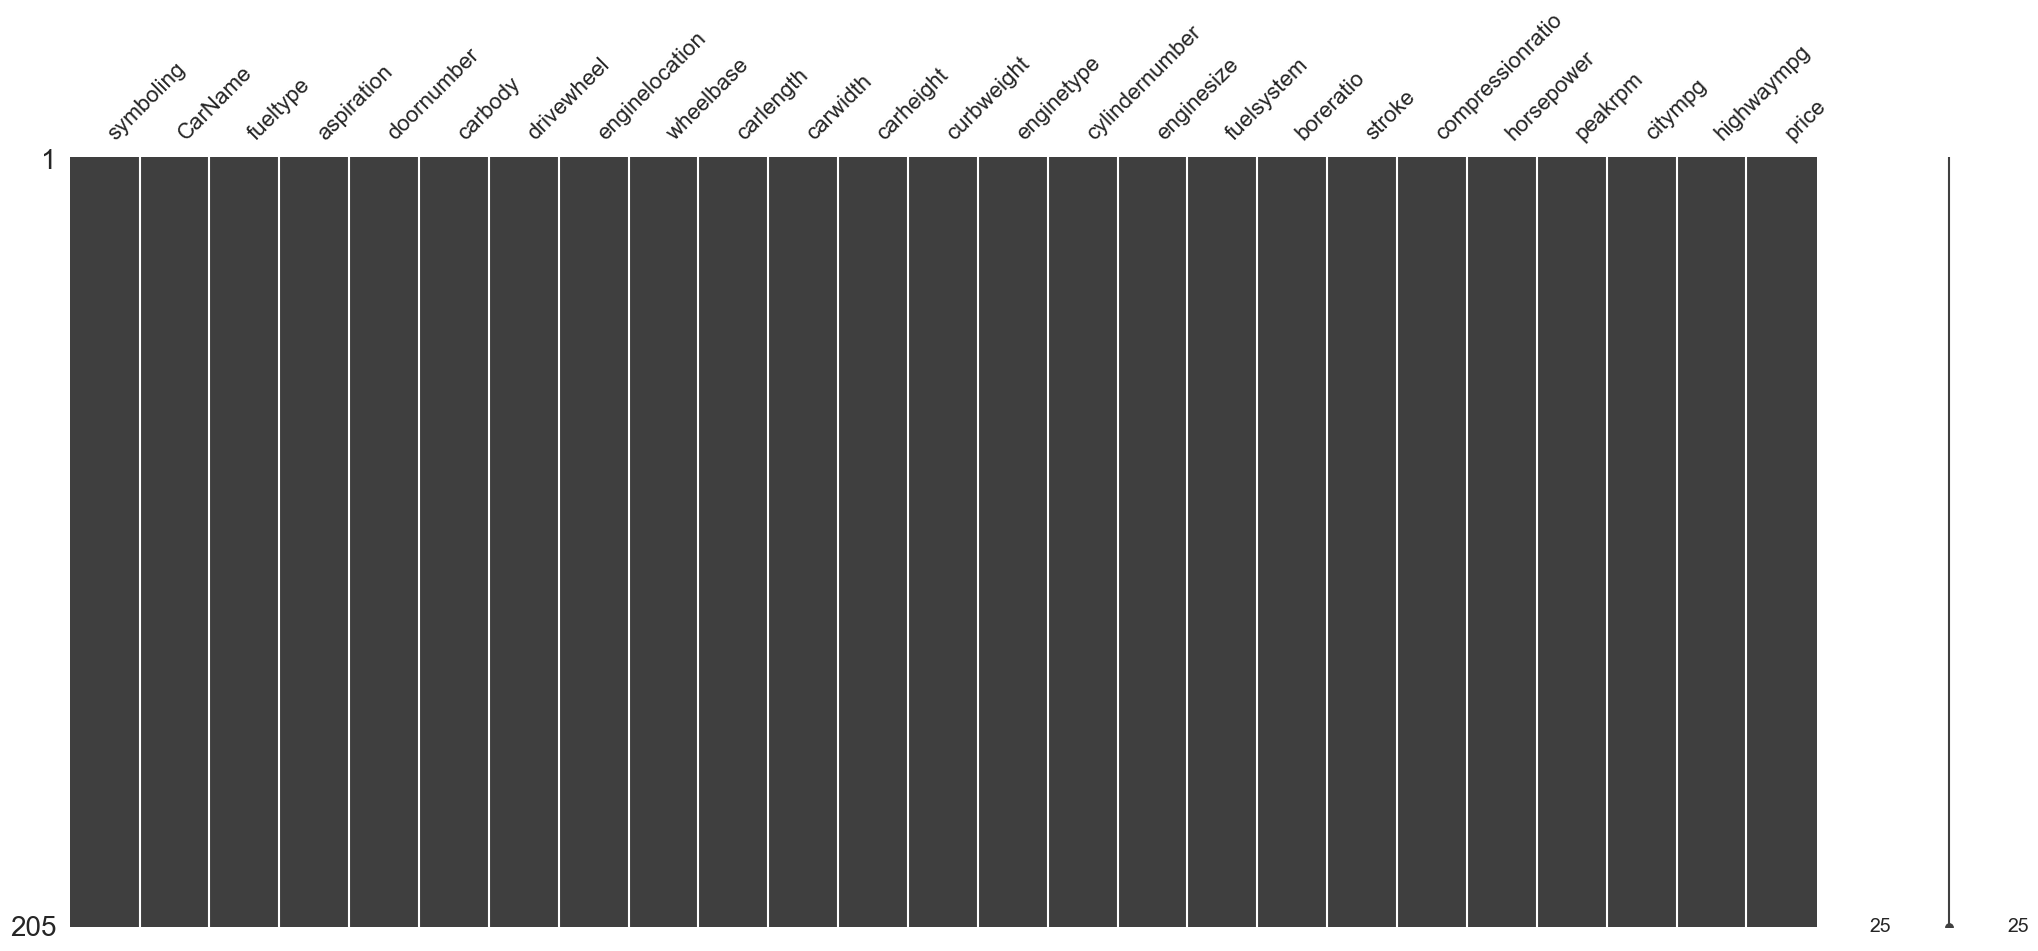

In [229]:
sns.set(style = "ticks") #指定风格
msno.matrix(data) #画图

# 通过查看缺失值数量 和 类别型变量数据 发现没有缺失值
df_na = (data.isna().sum()/data.shape[0]).sort_values(ascending=False)
print('数值型和类别型数据缺失值数量为：\n', df_na)
print('类别型数据缺失值数量为：', data[categorical_cols].isna().sum().sum())
data[categorical_cols]


发现没有缺失数据

### 2-2 处理车辆种类

In [230]:
print('车辆种类种数:', data['CarName'].unique().size)
# 按照车辆品牌分类
data['CarCompany']= data['CarName'].str.split(' ',expand=True)[0] 
data['CarCompany'].unique()
# 修正拼写问题
data['CarCompany'] = data['CarCompany'].replace({'alfa-romero':'alfa-romeo','maxda':'mazda', 'Nissan':'nissan',
'porschce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
data['CarCompany'].unique()

车辆种类种数: 147


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [231]:
#寻找数值变量中实际应该为类别变量的特征（即并不连续分布）
transform_cols = []
for col in numerical_cols:
    if len(data[col].unique()) < 20:
        transform_cols.append(col)
transform_cols
categorical_cols.append('symboling')
numerical_cols.remove('symboling')
data['symboling'] = data['symboling'].astype(str) #更改数据类型

['symboling']

### 2-3 数据分散度处理

In [232]:
features = data
features.columns
#查看【类别型】特征的唯一值分布情况
features[categorical_cols].describe(include='O').T # 'O' 来获取非数值列的统计信息
#对于类别型特征变量中，单个类型占比超过98％以上的特征进行删除.
freq_ = features[categorical_cols].describe(include='O').T.freq
drop_cols = []
for index,num in enumerate(freq_):
    if (freq_[index] > len(data['price'])*0.98) :
        drop_cols.append(freq_.index[index])
print('These drop_cols are:', drop_cols)
features = features.drop(drop_cols, axis=1)
print('The new shape is :', features.shape)
categorical_cols.remove('enginelocation')
features.shape

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarCompany'],
      dtype='object')

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


These drop_cols are: ['enginelocation']
The new shape is : (205, 25)


(205, 25)

In [233]:
#对于【数值型】特征变量中，所有值都一样的特征进行删除.
drop_cols = []
for col in numerical_cols:
    if data[col].std() == 0 :
        drop_cols.append(col)
print('These drop_cols are:', drop_cols)
features = features.drop(drop_cols, axis=1)
print('The new shape is :', features.shape)

These drop_cols are: []
The new shape is : (205, 25)


## 3 描述性统计

array([[<Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>],
       [<Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>],
       [<Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

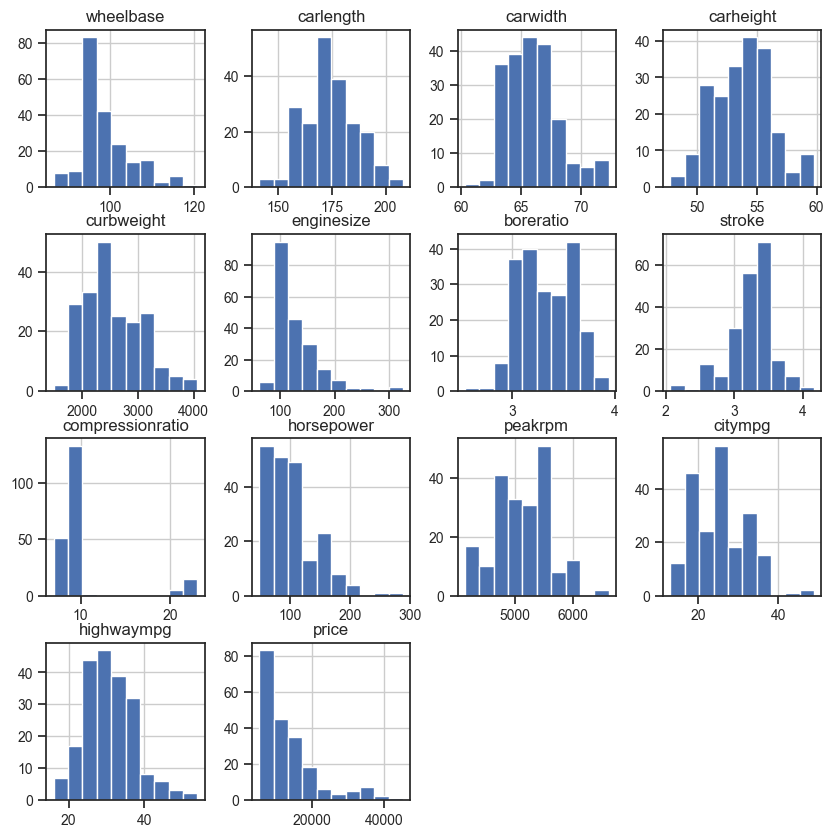

In [234]:
data.hist(xlabelsize=10,ylabelsize=10,figsize=(10,10))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

Text(0.5, 1.0, 'CarPrice')

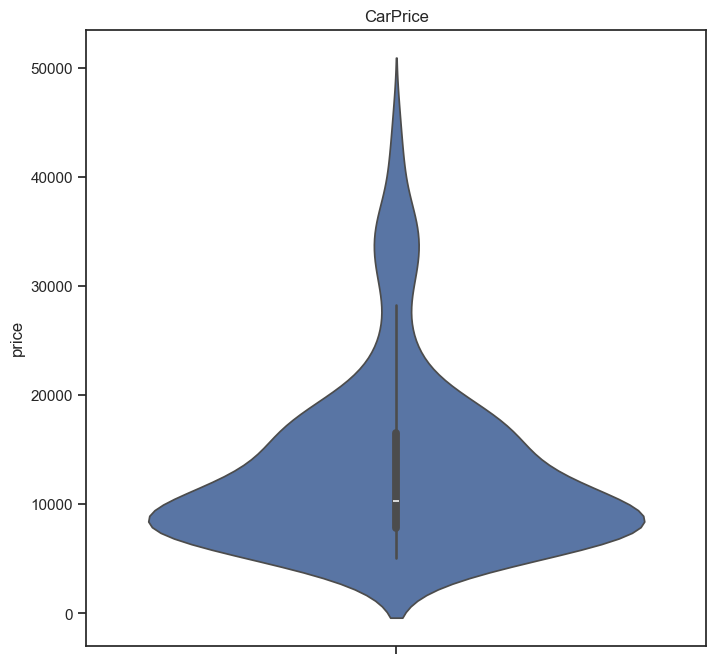

In [235]:
data['price'].describe()
#价格分布小提琴图
plt.style.use({'figure.figsize':(8,8)})
sns.violinplot(data=data['price'])
plt.title('CarPrice')

Text(0.5, 0, 'Company of the car')

Text(0, 0.5, 'Count of cars')

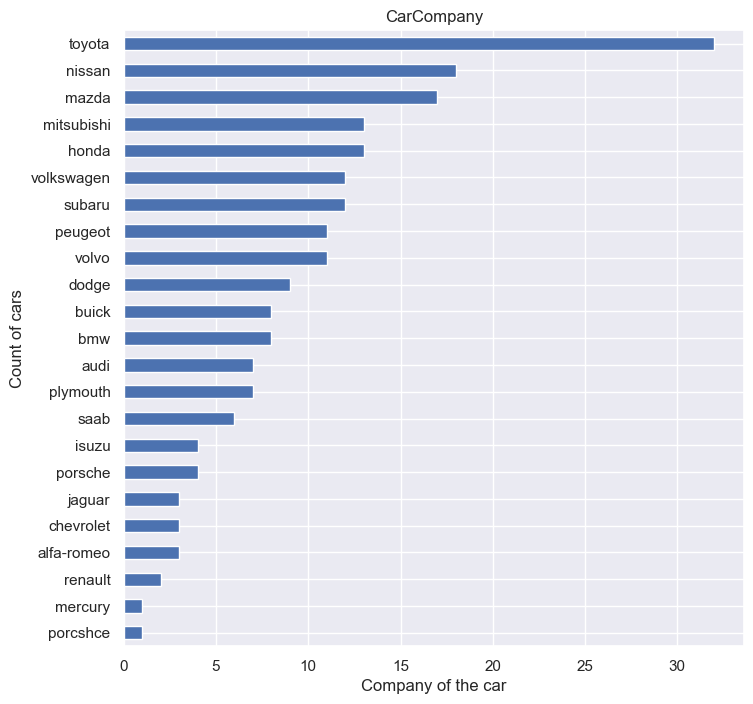

In [236]:
# 各个汽车公司的汽车数量
sns.set(style="darkgrid")
companyFig = data['CarCompany'].value_counts().sort_values(ascending=True).plot(kind = 'barh',stacked = True )
companyFig.title.set_text('CarCompany')
plt.style.use({'figure.figsize':(6,6)})
plt.xlabel('Company of the car')
plt.ylabel('Count of cars')

Text(0.5, 0, 'Company of the car')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'chevrolet'),
  Text(1, 0, 'dodge'),
  Text(2, 0, 'plymouth'),
  Text(3, 0, 'honda'),
  Text(4, 0, 'subaru'),
  Text(5, 0, 'isuzu'),
  Text(6, 0, 'mitsubishi'),
  Text(7, 0, 'renault'),
  Text(8, 0, 'toyota'),
  Text(9, 0, 'volkswagen'),
  Text(10, 0, 'nissan'),
  Text(11, 0, 'mazda'),
  Text(12, 0, 'saab'),
  Text(13, 0, 'peugeot'),
  Text(14, 0, 'alfa-romeo'),
  Text(15, 0, 'mercury'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'volvo'),
  Text(18, 0, 'bmw'),
  Text(19, 0, 'porsche'),
  Text(20, 0, 'porcshce'),
  Text(21, 0, 'buick'),
  Text(22, 0, 'jaguar')])

Text(0, 0.5, 'Price of car')

<function matplotlib.pyplot.show(close=None, block=None)>

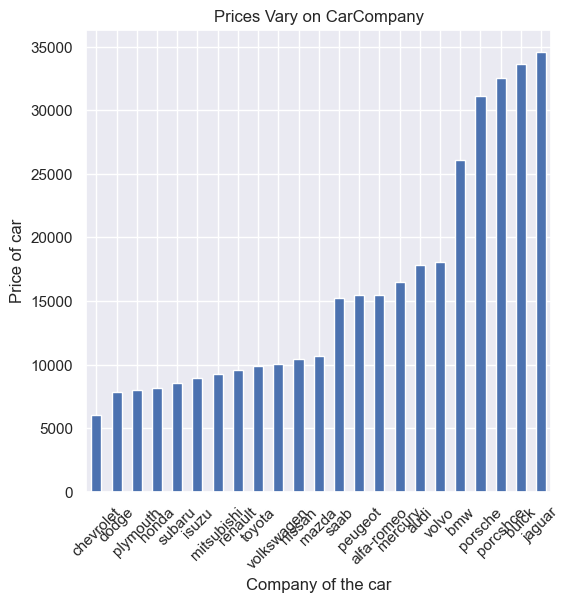

In [237]:
# 各个汽车公司之间的价格差异
groupePrice = data.groupby('CarCompany')['price'].mean().sort_values(ascending=True)
gpFig = groupePrice.plot(kind = 'bar',stacked = True )
gpFig.title.set_text('Prices Vary on CarCompany')
plt.style.use({'figure.figsize':(6,6)})
plt.xlabel('Company of the car')
plt.xticks(rotation=45)
plt.ylabel('Price of car')
plt.show

### 3-1 特征相关性

In [238]:
cormatrix = data[numerical_cols].corr()
# cormatrix #查看结果

#不同的展现格式
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T  #返回函数的上三角矩阵，把对角线上的置0，让他们不是最高的。
cormatrix = cormatrix.stack() #某一指标与其他指标的关系

# 找出前十个最相关的特征
cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
cormatrix.head(10)  


,FirstVariable,SecondVariable,Correlation
0,citympg,highwaympg,0.971337
1,carlength,curbweight,0.877728
2,wheelbase,carlength,0.874587
3,enginesize,price,0.874145
4,carwidth,curbweight,0.867032
5,curbweight,enginesize,0.850594
6,carlength,carwidth,0.841118
7,curbweight,price,0.835305
8,enginesize,horsepower,0.809769
9,horsepower,price,0.808139


In [239]:
data['volume'] = data.carlength * data.carwidth * data.carheight
data.drop(['carwidth', 'carlength', 'carheight', 
           'curbweight', 'citympg'], 
          axis = 1, # 1 for columns
          inplace = True) 
data.shape
numerical_cols.remove('carwidth')
numerical_cols.remove('carlength')
numerical_cols.remove('carheight')
numerical_cols.remove('curbweight')
numerical_cols.remove('citympg')
numerical_cols.append('volume')
data.head(5)

(205, 22)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,CarCompany,volume
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,dohc,...,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,alfa-romeo,528019.904
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,dohc,...,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,alfa-romeo,528019.904
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,ohcv,...,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,alfa-romeo,587592.640
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,ohc,...,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,audi,634816.956
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,ohc,...,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,audi,636734.832


<Axes: >

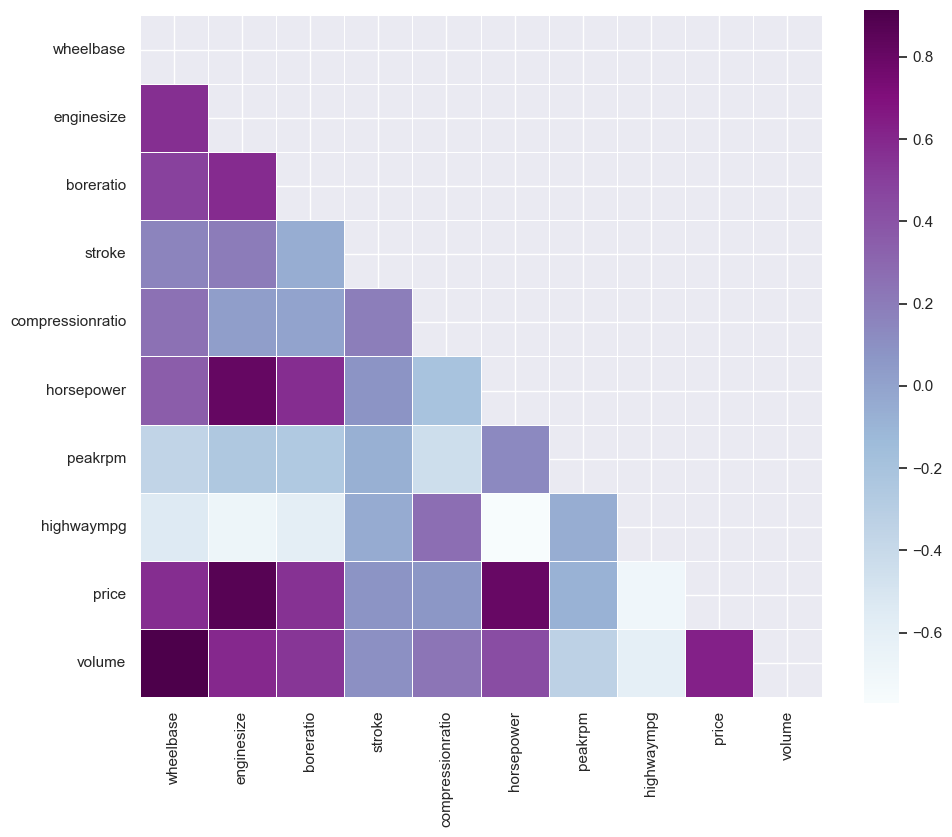

In [240]:
# Compute the correlation matrix 
corr_all = data[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

fuel_type: ['gas' 'diesel'] 
doors: ['two' 'four']


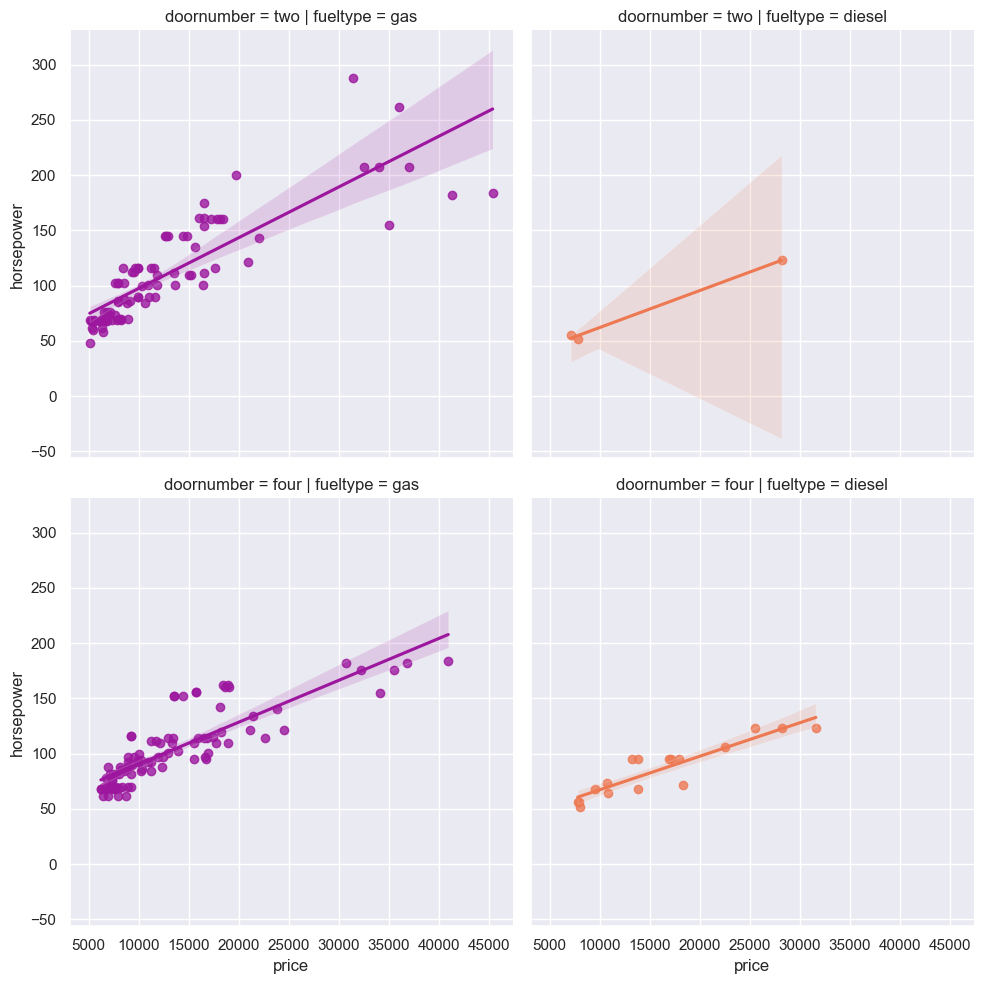

In [241]:
print('fuel_type:', data['fueltype'].unique(), '\ndoors:', data['doornumber'].unique())
sns.lmplot(x='price', y='horsepower', data=data, 
           hue = 'fueltype', col = 'fueltype',  row = 'doornumber', 
           palette = 'plasma', 
           fit_reg = True);


fuel_type: ['gas' 'diesel'] 
doors: ['two' 'four']


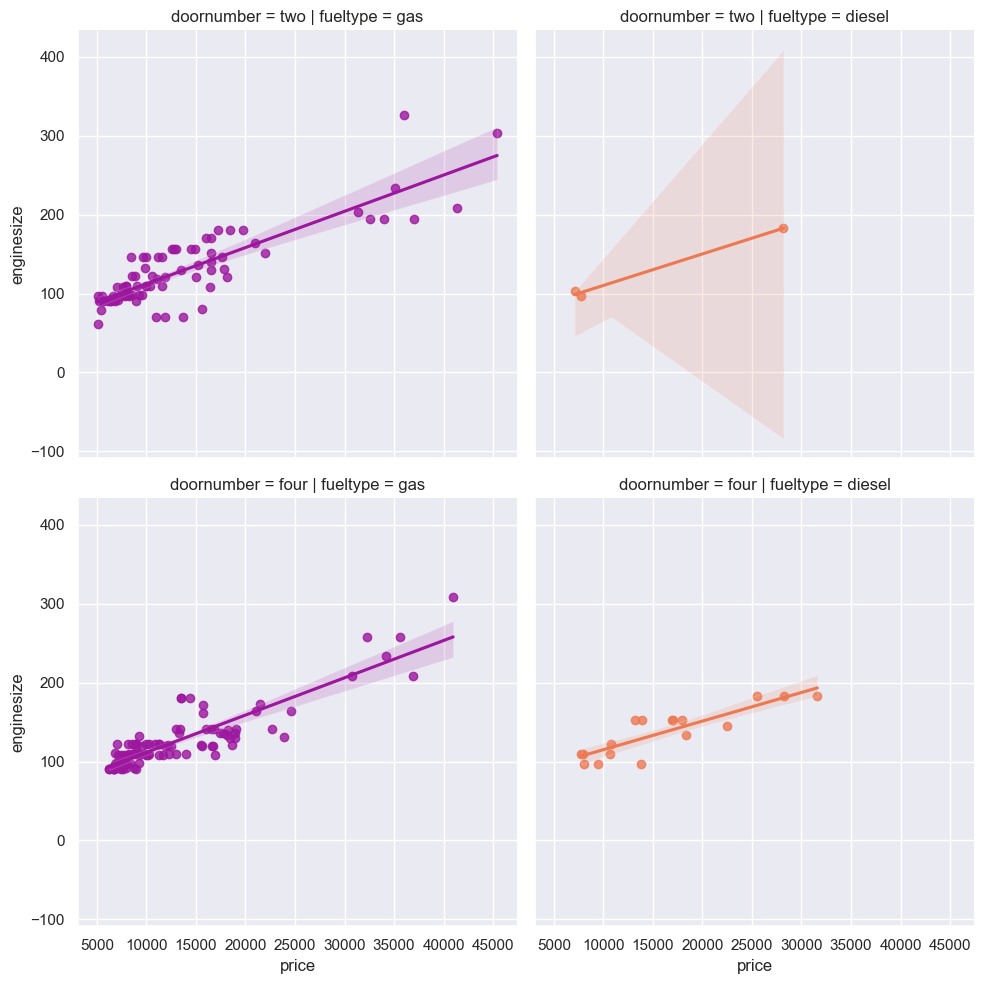

In [242]:
print('fuel_type:', data['fueltype'].unique(), '\ndoors:', data['doornumber'].unique())
sns.lmplot(x='price', y='enginesize', data=data, 
           hue = 'fueltype', col = 'fueltype',  row = 'doornumber', 
           palette = 'plasma', 
           fit_reg = True);


<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='CarCompany', ylabel='price'>

<Figure size 2000x2000 with 0 Axes>

<Axes: >

<Axes: xlabel='fueltype', ylabel='price'>

<Axes: >

<Axes: xlabel='aspiration', ylabel='price'>

<Axes: >

<Axes: xlabel='doornumber', ylabel='price'>

<Axes: >

<Axes: xlabel='carbody', ylabel='price'>

<Axes: >

<Axes: xlabel='drivewheel', ylabel='price'>

<Axes: >

<Axes: xlabel='enginetype', ylabel='price'>

<Axes: >

<Axes: xlabel='cylindernumber', ylabel='price'>

<Axes: >

<Axes: xlabel='fuelsystem', ylabel='price'>

<Axes: >

<Axes: xlabel='symboling', ylabel='price'>

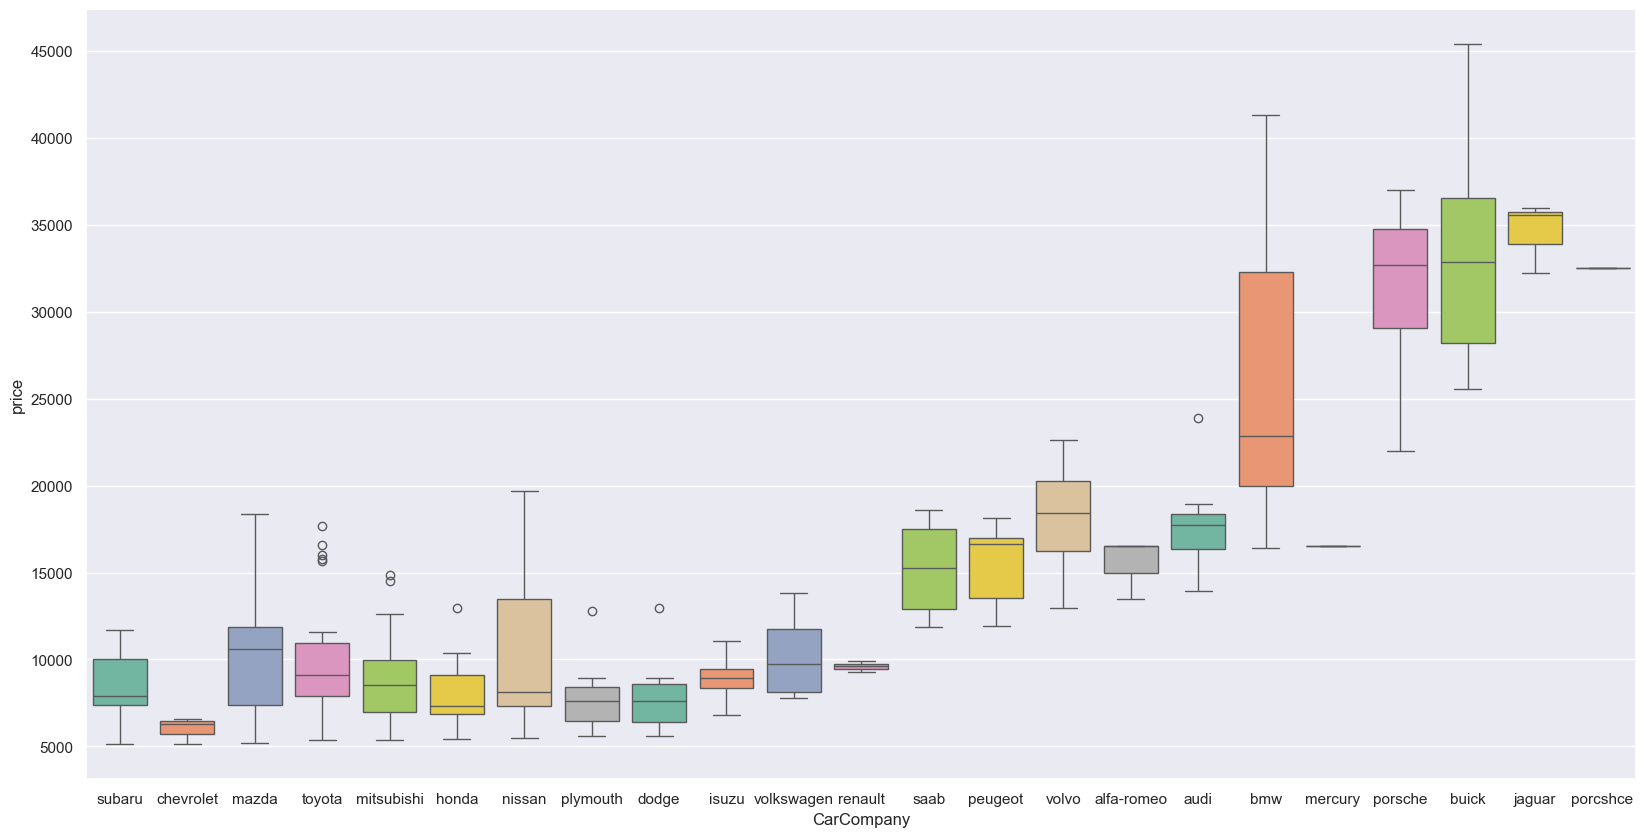

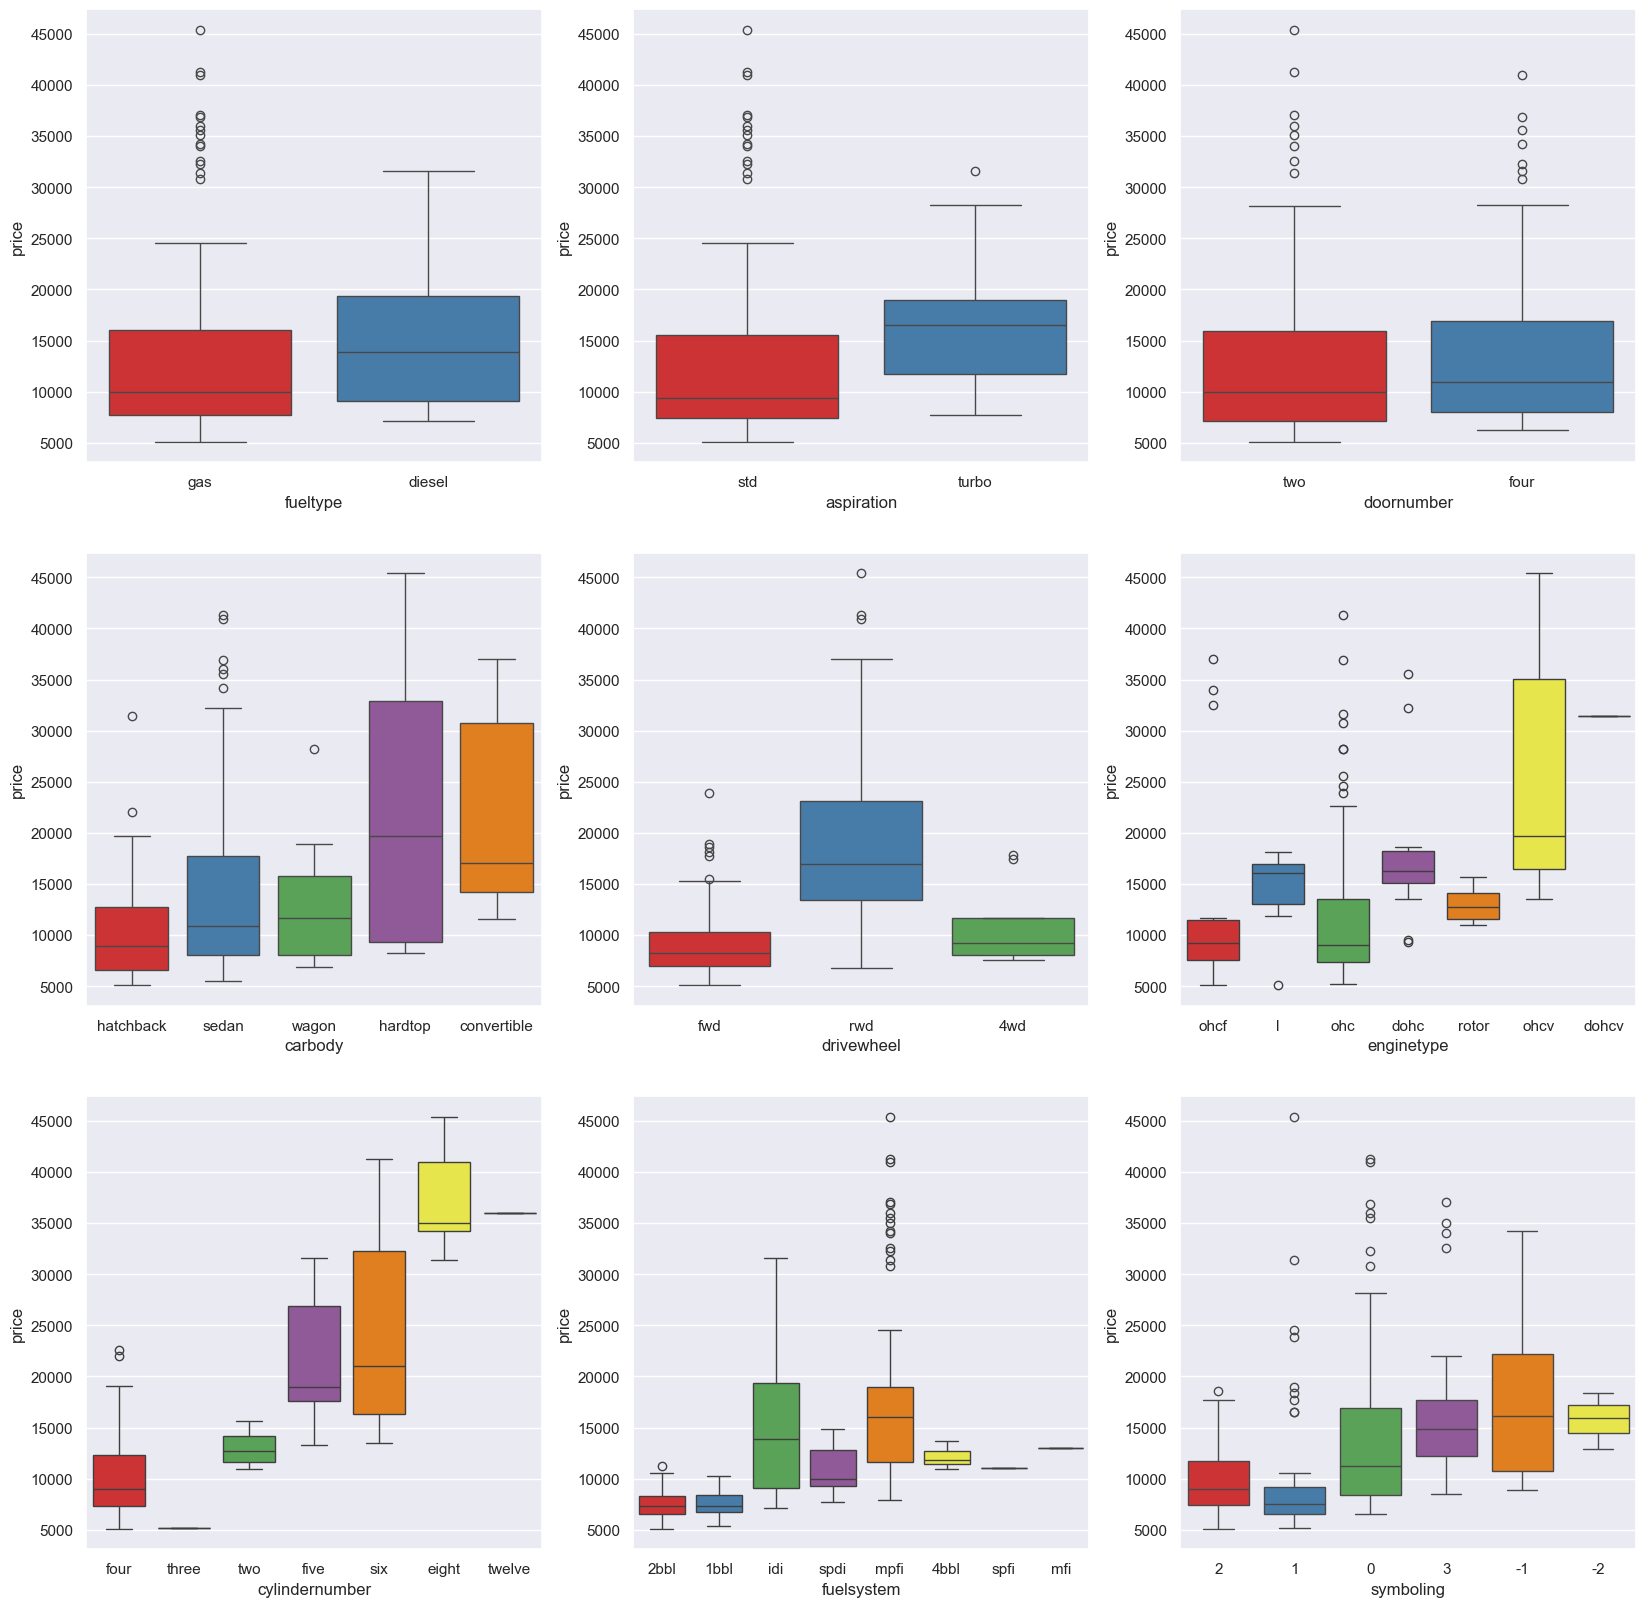

In [243]:
# # 查看数据中分类变量对于价格的影响
plt.figure(figsize = (20,10))
sns.boxplot(x = 'CarCompany' , y = 'price',data = data.sort_values('price'),palette="Set2")

plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype' , y = 'price',data =data.sort_values('price'),palette="Set1")
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration' , y = 'price',data = data.sort_values('price'),palette="Set1")
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber' , y = 'price',data =data.sort_values('price'),palette="Set1")
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody' , y = 'price',data =data.sort_values('price'),palette="Set1")
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel' , y = 'price',data = data.sort_values('price'),palette="Set1")
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype' , y = 'price',data = data.sort_values('price'),palette="Set1")
plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber' , y = 'price',data =data.sort_values('price'),palette="Set1")
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem' , y = 'price',data = data.sort_values('price'),palette="Set1")
plt.subplot(3,3,9)
sns.boxplot(x = 'symboling' , y = 'price',data = data.sort_values('price'),palette="Set1")

## 4-数据预处理

In [244]:
# target and features
# target = data['price']
# numerical_cols
# # scale the data
# standard_scaler = StandardScaler()
# features[numerical_cols] = standard_scaler.fit_transform(features[numerical_cols])

# # glimpse
# features.head()

In [245]:
# create new dataset with only continios vars 
# dummies = pd.get_dummies(features[categorical_cols])
# features = features.join(dummies).drop(categorical_cols, 
#                                        axis = 1)

# # new dataset
# print('In total:', features.shape)
# features.head()


## 5 因变量矫正

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='price', ylabel='Density'>

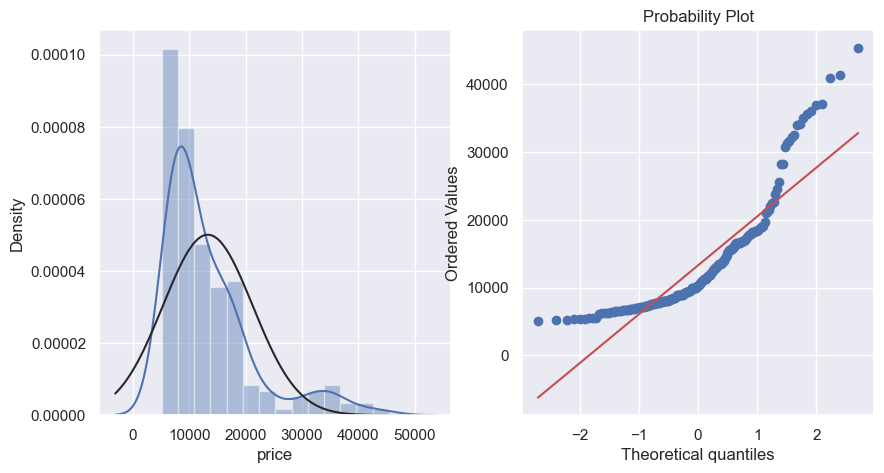

In [246]:
target = data['price']
#对'price'绘制直方图和Q-Q图
plt.figure(figsize=(10,5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(target,fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(target,plot=plt) #正态分布


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='price', ylabel='Density'>

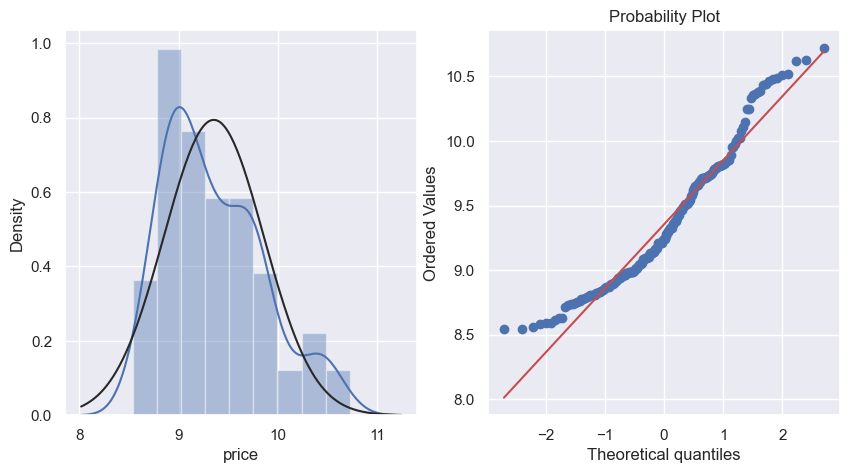

In [247]:
# 使用log1p也就是log(1+x)，用来对房价数据进行数据预处理，它的好处是转化后的数据更加服从正态分布，有利于后续的评估结果。
#但需要注意最后需要将预测出的平滑数据还原，而还原过程就是log1p的逆运算expm1
log_target = np.log1p(target)
plt.figure(figsize=(10,5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(log_target,fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(log_target,plot=plt)

## 6 自变量处理

In [248]:
# 挑选最终的自变量
features.dtypes

sig_col = ['wheelbase','enginesize','boreratio','stroke','compressionratio',
           'horsepower','peakrpm','volume','symboling','fueltype','aspiration','carbody','drivewheel',
           'enginetype','cylindernumber','fuelsystem','CarCompany']
sig_data = data[sig_col]
#数据分为 数字型变量数据集 和分类型数据集
sig_num = ['wheelbase','enginesize','boreratio','stroke','compressionratio',
           'horsepower','peakrpm','volume']
sig_cat = ['symboling','fueltype','aspiration','carbody','drivewheel',
           'enginetype','cylindernumber','fuelsystem','CarCompany']

symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CarCompany           object
dtype: object

In [249]:
sig_data.shape
sig_num
sig_cat

(205, 17)

['wheelbase',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'volume']

['symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany']

### 6-1 数值型数据标准化

In [250]:
# 数值型 标准化
# scale the data
standard_scaler = StandardScaler()
sig_data[sig_num] = standard_scaler.fit_transform(sig_data[sig_num])

# glimpse
print('In total:', sig_data.shape)
sig_data.head()

In total: (205, 17)


,wheelbase,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,volume,symboling,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,CarCompany
0,-1.690772,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-1.144195,3,gas,std,convertible,rwd,dohc,four,mpfi,alfa-romeo
1,-1.690772,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-1.144195,3,gas,std,convertible,rwd,dohc,four,mpfi,alfa-romeo
2,-0.708596,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.392670,1,gas,std,hatchback,rwd,ohcv,six,mpfi,alfa-romeo
3,0.173698,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,0.203076,2,gas,std,sedan,fwd,ohc,four,mpfi,audi
4,0.107110,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,0.227271,2,gas,std,sedan,4wd,ohc,five,mpfi,audi


### 6-2 类别型数据编码

In [251]:
# create new dataset with only continios vars 
dummies = pd.get_dummies(sig_data[sig_cat])
sig_data = sig_data.join(dummies).drop(sig_cat, 
                                       axis = 1)
# sig_data = pd.get_dummies(sig_data,columns=sig_cat, dtype=float,drop_first=True).reset_index(drop=True)
# new dataset
print('In total:', sig_data.shape)
sig_data.head()

In total: (205, 71)


,wheelbase,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,volume,symboling_-1,symboling_-2,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porcshce,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,-1.690772,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-1.144195,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.690772,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-1.144195,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.708596,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.392670,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.173698,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,0.203076,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.107110,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,0.227271,False,False,...,False,False,False,False,False,False,False,False,False,False


## 任务1：对因变量price建立两个合适的回归模型
通过分析找出的对价格可能有影响的变量如下：
'enginesize','curbweight','horsepower','carwidth',
'carlength','wheelbase','boreratio','peakrpm',
'citympg','highwaympg','fueltype','aspiration',
'carbody','drivewheel','enginelocation','enginetype',
'cylindernumber','fuelsystem','price_category'

### 数据划分

In [252]:
# 划分训练集和测试集
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(sig_data, log_target, test_size = 0.3,  random_state = seed)
print("Train", X_train.shape, "and test", X_test.shape)


Train (143, 71) and test (62, 71)


### 最小二乘法回归

In [253]:
OLS_X = sm.add_constant(sig_data,prepend=True)
lm = sm.OLS(log_target,OLS_X.astype(float))
lm_result = lm.fit()
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     51.15
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.58e-73
Time:                        20:09:33   Log-Likelihood:                 166.14
No. Observations:                 205   AIC:                            -212.3
Df Residuals:                     145   BIC:                            -12.90
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.87

In [254]:
# 4.向前逐步回归
def forward_stepwise_regression(X, y):
    selected = []  # 选定的自变量列表
    remaining = list(X.columns)  # 剩余的自变量列表
    current_score, best_new_score = 0.0, 0.0
    while remaining:
        scores_candidates = [] #候选集
        for candidate in remaining: #候选集的每一个变量依次加入
            model_features = selected + [candidate]
            X_sub = X.loc[:, model_features]
            lm = sm.OLS(y, sm.add_constant(X_sub, prepend=True).astype(float))
            lm_result = lm.fit()
            score = lm_result.rsquared_adj
            scores_candidates.append((score, candidate))
        scores_candidates.sort() #排序
        best_new_score, best_candidate = scores_candidates.pop()
        if current_score < best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else: #如果加入变量不能使模型更优，则终止
            break
    return selected


selected_features = forward_stepwise_regression(sig_data, log_target)
print(len(selected_features))

34


In [255]:
print(len(selected_features))
selected_features

34


['enginesize',
 'fuelsystem_2bbl',
 'drivewheel_fwd',
 'volume',
 'horsepower',
 'cylindernumber_four',
 'carbody_convertible',
 'CarCompany_bmw',
 'fueltype_diesel',
 'symboling_3',
 'CarCompany_toyota',
 'enginetype_ohc',
 'CarCompany_porsche',
 'carbody_sedan',
 'CarCompany_porcshce',
 'wheelbase',
 'CarCompany_saab',
 'CarCompany_audi',
 'CarCompany_buick',
 'enginetype_dohcv',
 'symboling_0',
 'CarCompany_mazda',
 'CarCompany_volvo',
 'CarCompany_jaguar',
 'CarCompany_alfa-romeo',
 'CarCompany_isuzu',
 'symboling_-2',
 'fuelsystem_1bbl',
 'CarCompany_honda',
 'aspiration_turbo',
 'CarCompany_nissan',
 'CarCompany_volkswagen',
 'enginetype_rotor',
 'aspiration_std']

In [256]:
NEWOLS_X = sm.add_constant(sig_data.loc[:,selected_features],prepend=True)
lm = sm.OLS(log_target,NEWOLS_X.astype(float))
lm_result = lm.fit()
print(lm_result.summary())
lm_result.params

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.00e-96
Time:                        20:09:44   Log-Likelihood:                 162.22
No. Observations:                 205   AIC:                            -256.4
Df Residuals:                     171   BIC:                            -143.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.23

const                    6.238440
enginesize               0.083517
fuelsystem_2bbl         -0.108588
drivewheel_fwd          -0.103257
volume                   0.036420
horsepower               0.122755
cylindernumber_four     -0.077897
carbody_convertible      0.291621
CarCompany_bmw           0.430839
fueltype_diesel          0.029578
symboling_3              0.102653
CarCompany_toyota        0.002898
enginetype_ohc           0.022569
CarCompany_porsche       0.609946
carbody_sedan            0.031065
CarCompany_porcshce      0.695116
wheelbase                0.100264
CarCompany_saab          0.271579
CarCompany_audi          0.317361
CarCompany_buick         0.335572
enginetype_dohcv        -0.300624
symboling_0              0.066013
CarCompany_mazda         0.122205
CarCompany_volvo         0.194322
CarCompany_jaguar        0.199753
CarCompany_alfa-romeo    0.199940
CarCompany_isuzu         0.131219
symboling_-2            -0.094760
fuelsystem_1bbl         -0.310334
CarCompany_hon

<Figure size 600x600 with 0 Axes>

(array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 [Text(0, -0.4, '−0.4'),
  Text(0, -0.30000000000000004, '−0.3'),
  Text(0, -0.2, '−0.2'),
  Text(0, -0.09999999999999998, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.09999999999999998, '0.1'),
  Text(0, 0.20000000000000007, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4')])

(array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 [Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5'),
  Text(10.0, 0, '10.0'),
  Text(10.5, 0, '10.5'),
  Text(11.0, 0, '11.0')])

Text(0.5, 0, 'yhat')

Text(0, 0.5, 'residuals')

0     -0.138182
1      0.062846
2      0.075336
3      0.055672
4      0.009423
         ...   
200   -0.032925
201   -0.137022
202    0.028463
203    0.080389
204    0.177885
Length: 205, dtype: float64


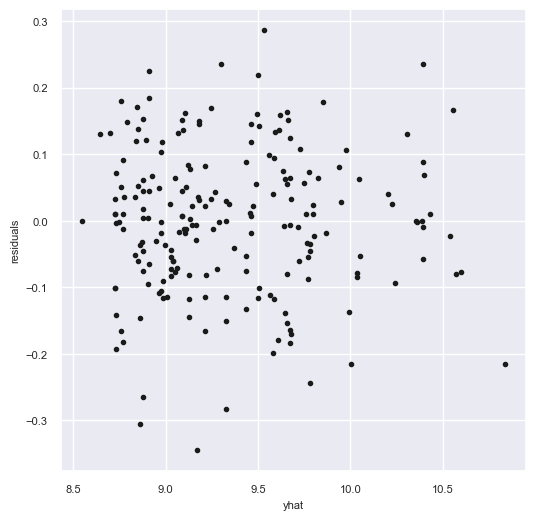

In [257]:
y_hat=lm_result.fittedvalues
#画出因变量 y 的拟合值与残差的散点图
res=lm_result.resid
plt.figure()
plt.plot(y_hat,res,'.k')
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.xlabel('yhat',fontdict={'size':8})
plt.ylabel('residuals',fontdict={'size':8})
print(res)

### 岭回归

RidgeCV(alphas=[0.01])

RidgeCV(alphas=[0.01438449888287663])

RidgeCV(alphas=[0.0206913808111479])

RidgeCV(alphas=[0.029763514416313176])

RidgeCV(alphas=[0.04281332398719394])

RidgeCV(alphas=[0.06158482110660264])

RidgeCV(alphas=[0.08858667904100823])

RidgeCV(alphas=[0.12742749857031335])

RidgeCV(alphas=[0.18329807108324356])

RidgeCV(alphas=[0.26366508987303583])

RidgeCV(alphas=[0.37926901907322497])

RidgeCV(alphas=[0.5455594781168517])

RidgeCV(alphas=[0.7847599703514611])

RidgeCV(alphas=[1.1288378916846884])

RidgeCV(alphas=[1.623776739188721])

RidgeCV(alphas=[2.3357214690901213])

RidgeCV(alphas=[3.359818286283781])

RidgeCV(alphas=[4.832930238571752])

RidgeCV(alphas=[6.951927961775605])

RidgeCV(alphas=[10.0])

RidgeCV(cv=10)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Regularization Parameter (alpha)')

Text(0, 0.5, 'R-squared Score')

Text(0.5, 1.0, 'Impact of Regularization on RidgeCV Performance')

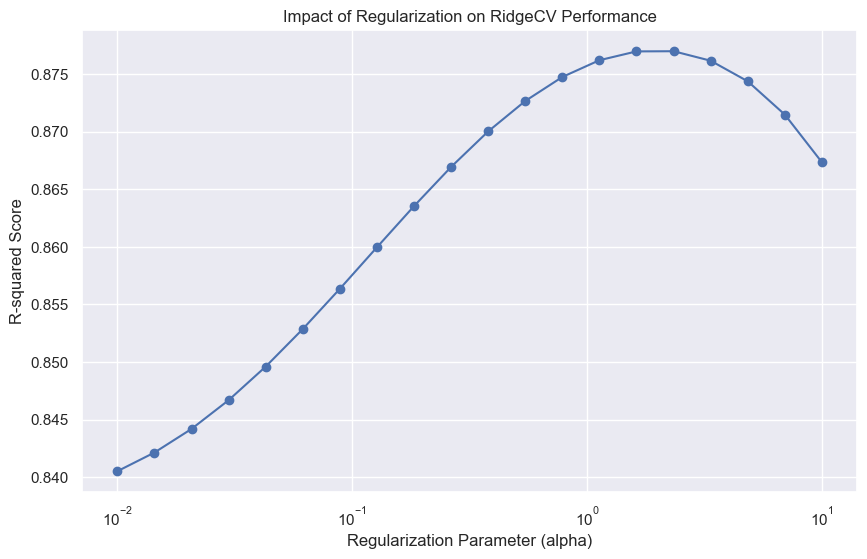

In [258]:
# 在不同正则化参数下训练模型并计算得分
n_alphas=20
seed = 100
alphas=np.logspace(-2,1,n_alphas)
scores = []
for alpha in alphas:
    ridge_cv = RidgeCV(alphas=[alpha])
    ridge_cv.fit(X_train, y_train)
    score = ridge_cv.score(X_test, y_test)
    scores.append(score)

ridgecv = RidgeCV(cv = 10)  #cv交叉验证简称，cv=10，分成十份九份训练一份，
ridgecv.fit(sig_data, log_target)              #features 机器能够识别的数据，target价格列
ridgecv_score = ridgecv.score(sig_data, log_target)   #得到score
ridgecv_alpha = ridgecv.alpha_       #得到score后再把alpha拿出来

# 绘制正则化参数与R-squared得分的关系
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, scores, marker='o')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('R-squared Score')
plt.title('Impact of Regularization on RidgeCV Performance')
plt.grid(True)
plt.show()

Ridge picked 71 features and eliminated the other 0 features.


<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

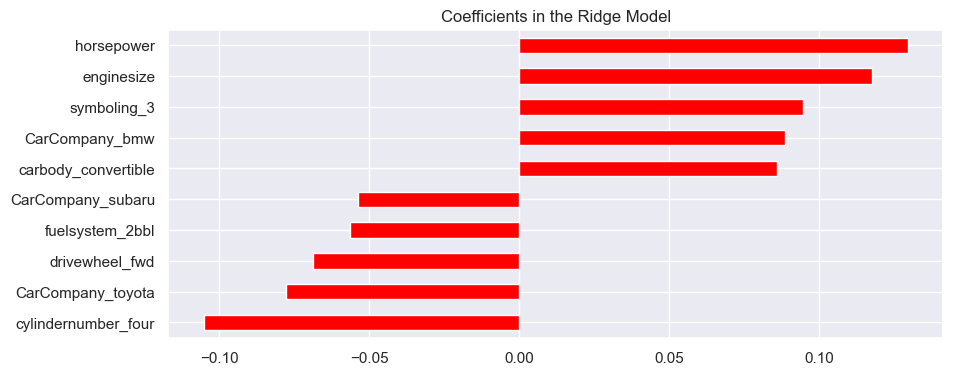

In [259]:
coefs = pd.Series(ridgecv.coef_, index = sig_data.columns)
 
# prints out the number of picked/eliminated features
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")
 
# takes first and last 10
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])
 
plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh", color = 'red')
plt.title("Coefficients in the Ridge Model")
plt.show()

In [260]:
model_l1 = RidgeCV(alphas = alphas, cv = 10).fit(X_train, y_train)
y_pred_l1 = np.expm1(model_l1.predict(X_test))
 
model_l1.score(X_test, y_test)

0.8743832070341541

<Axes: xlabel='preds', ylabel='residuals'>

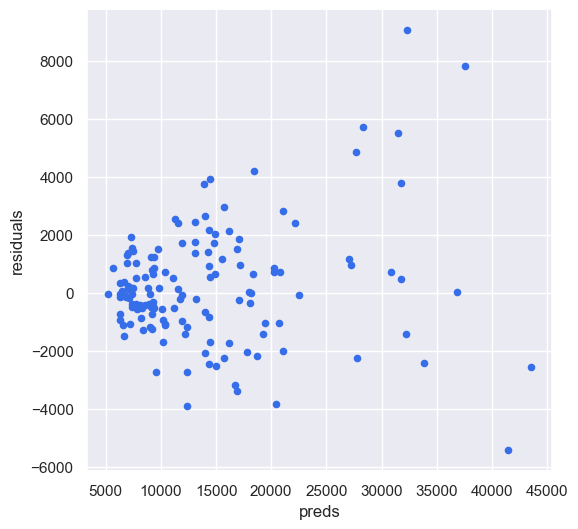

In [261]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)
 
preds = pd.DataFrame({"preds": np.expm1(model_l1.predict(X_train)), "true": np.expm1(y_train)})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter", color = c)

In [262]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse
 
def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('R2: %2.3f' % r2)     
    return r2
 
MSE(np.expm1(y_test), y_pred_l1); R2(np.expm1(y_test), y_pred_l1);

MSE: 4619878.765
R2: 0.859


In [263]:
# predictions
d = {'true' : list(np.expm1(y_test)),
     'predicted' : pd.Series(y_pred_l1)
    }
 
pd.DataFrame(d).head()

,true,predicted
0,9279.0,9284.353510
1,35056.0,26414.950842
2,17075.0,19214.137459
3,7898.0,8997.494121
4,8058.0,8122.189766


### Lasso回归

Lasso(alpha=0.001, random_state=100)

Lasso(alpha=0.001, random_state=100)

Lasso(alpha=0.0014384498882876629, random_state=100)

Lasso(alpha=0.0014384498882876629, random_state=100)

Lasso(alpha=0.00206913808111479, random_state=100)

Lasso(alpha=0.00206913808111479, random_state=100)

Lasso(alpha=0.002976351441631319, random_state=100)

Lasso(alpha=0.002976351441631319, random_state=100)

Lasso(alpha=0.004281332398719396, random_state=100)

Lasso(alpha=0.004281332398719396, random_state=100)

Lasso(alpha=0.006158482110660267, random_state=100)

Lasso(alpha=0.006158482110660267, random_state=100)

Lasso(alpha=0.008858667904100823, random_state=100)

Lasso(alpha=0.008858667904100823, random_state=100)

Lasso(alpha=0.012742749857031334, random_state=100)

Lasso(alpha=0.012742749857031334, random_state=100)

Lasso(alpha=0.018329807108324356, random_state=100)

Lasso(alpha=0.018329807108324356, random_state=100)

Lasso(alpha=0.026366508987303583, random_state=100)

Lasso(alpha=0.026366508987303583, random_state=100)

Lasso(alpha=0.0379269019073225, random_state=100)

Lasso(alpha=0.0379269019073225, random_state=100)

Lasso(alpha=0.05455594781168517, random_state=100)

Lasso(alpha=0.05455594781168517, random_state=100)

Lasso(alpha=0.07847599703514611, random_state=100)

Lasso(alpha=0.07847599703514611, random_state=100)

Lasso(alpha=0.11288378916846883, random_state=100)

Lasso(alpha=0.11288378916846883, random_state=100)

Lasso(alpha=0.1623776739188721, random_state=100)

Lasso(alpha=0.1623776739188721, random_state=100)

Lasso(alpha=0.23357214690901212, random_state=100)

Lasso(alpha=0.23357214690901212, random_state=100)

Lasso(alpha=0.3359818286283781, random_state=100)

Lasso(alpha=0.3359818286283781, random_state=100)

Lasso(alpha=0.4832930238571752, random_state=100)

Lasso(alpha=0.4832930238571752, random_state=100)

Lasso(alpha=0.6951927961775606, random_state=100)

Lasso(alpha=0.6951927961775606, random_state=100)

Lasso(random_state=100)

Lasso(random_state=100)

LassoCV(cv=5, random_state=100)

<Figure size 1000x400 with 0 Axes>

Text(0.5, 0, '$\\alpha$')

Text(0, 0.5, 'CV Score')

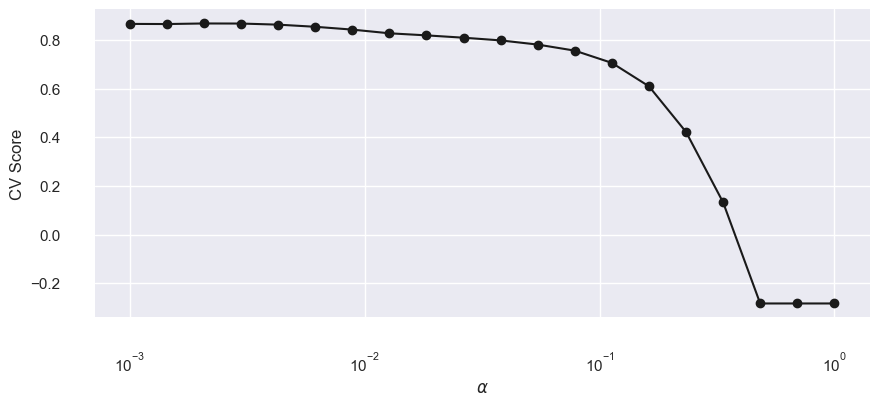

In [264]:
n_alphas=20
alphas=np.logspace(-3,0,n_alphas)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):   #enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    lasso = Lasso(random_state = seed)
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)  #利用测试集获取模型的优劣程度

lassocv = LassoCV(cv = 5, random_state = seed) 
lassocv.fit(sig_data, log_target)
lassocv_score = lassocv.score(sig_data, log_target)
lassocv_alpha = lassocv.alpha_
plt.figure(figsize=(10,4))
plt.plot(alphas,scores,'-ko')
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log')
sns.despine(offset = 15)     #两根轴的靠近程度

In [265]:
lassocv.alpha_
lassocv.coef_
lassocv.intercept_

0.004181033503647505

array([ 0.02601265,  0.08009586,  0.01070157, -0.01281444,  0.03808316,
        0.17568756,  0.00255345,  0.12003535, -0.        , -0.        ,
        0.00514521, -0.        , -0.        ,  0.12657333,  0.        ,
       -0.        , -0.        ,  0.        ,  0.12122364,  0.        ,
       -0.04776062,  0.        , -0.04036525, -0.        , -0.10461947,
        0.01960377, -0.        , -0.        , -0.        ,  0.07008944,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.16019994, -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.06235823,  0.        ,  0.        , -0.        ,
        0.02339204, -0.        ,  0.        ,  0.        ,  0.        ,
        0.10321776,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.04269508, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.07152   , -0.  

9.501966293227524

Lasso picked 22 features and eliminated the other 49 features.


<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

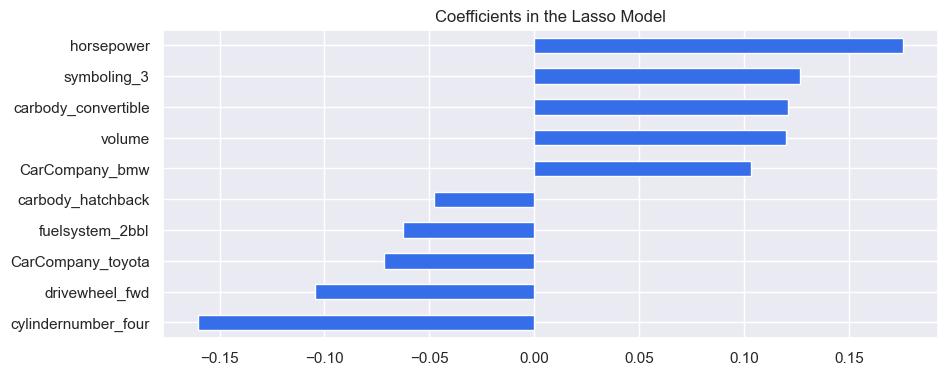

In [266]:
# lassocv coefficients
coefs = pd.Series(lassocv.coef_, index = sig_data.columns)

# prints out the number of picked/eliminated features
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")

# 展示前5个和后5个
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh", color = c)
plt.title("Coefficients in the Lasso Model")
plt.show()


In [267]:
model_l1 = LassoCV(alphas = alphas, cv = 10).fit(X_train, y_train)
y_pred_l1 = np.expm1(model_l1.predict(X_test))
 
model_l1.score(X_test, y_test)

0.8670520954915336

<Axes: xlabel='preds', ylabel='residuals'>

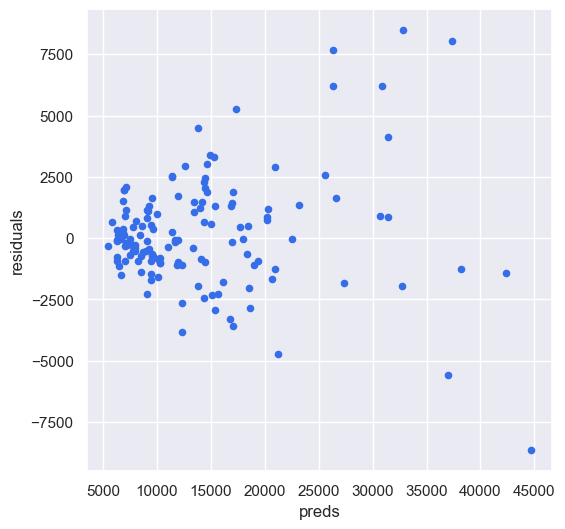

In [268]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)
 
preds = pd.DataFrame({"preds": np.expm1(model_l1.predict(X_train)), "true": np.expm1(y_train)})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter", color = c)

In [269]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse
 
def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('R2: %2.3f' % r2)     
    return r2
 
MSE(np.expm1(y_test), y_pred_l1); R2(np.expm1(y_test), y_pred_l1);

MSE: 4687041.734
R2: 0.857


In [270]:
# predictions
d = {'true' : list(np.expm1(y_test)),
     'predicted' : pd.Series(y_pred_l1)
    }
 
pd.DataFrame(d).head()

,true,predicted
0,9279.0,10073.738726
1,35056.0,27822.424827
2,17075.0,19258.666779
3,7898.0,8778.322216
4,8058.0,8152.555107


<Axes: xlabel='price', ylabel='Density'>

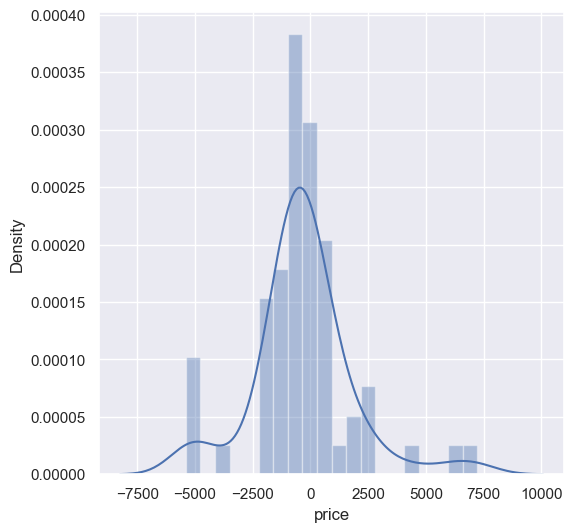

In [271]:
# 残差图
sns.distplot((np.expm1(y_test) - y_pred_l1), bins = 20)

## 任务2：逻辑回归模型

### price转换为分类指标

In [272]:
data['price'] = data['price'].astype('int')
data_temp = data.copy()
price_mean = data_temp.groupby(['CarCompany'])['price'].mean()
data_temp = data_temp.merge(price_mean.reset_index(),how='left',on= 'CarCompany')
bins = [0,10000,20000,40000]
label = ['cheap','ordinary','expensive']
data['price_category'] = pd.cut(data_temp['price_y'],bins,right=False,labels=label)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,...,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,CarCompany,volume,price_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,dohc,...,3.47,2.68,9.0,111,5000,27,13495,alfa-romeo,528019.904,ordinary
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,dohc,...,3.47,2.68,9.0,111,5000,27,16500,alfa-romeo,528019.904,ordinary
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,ohcv,...,2.68,3.47,9.0,154,5000,26,16500,alfa-romeo,587592.640,ordinary
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,ohc,...,3.19,3.40,10.0,102,5500,30,13950,audi,634816.956,ordinary
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,ohc,...,3.19,3.40,8.0,115,5500,22,17450,audi,636734.832,ordinary


In [273]:
data['price_category'].value_counts()

price_category
cheap        95
ordinary     86
expensive    24
Name: count, dtype: int64

In [274]:
X_train, X_test, y_train, y_test = train_test_split(sig_data, data['price_category'], test_size = 0.3,  random_state = seed)
print("Train", X_train.shape, "and test", X_test.shape)

Train (143, 71) and test (62, 71)


LogisticRegressionCV(Cs=[1, 10, 100, 1000], cv=5, multi_class='ovr',
                     penalty='l1', scoring='neg_log_loss', solver='liblinear')

{'cheap': array([[-0.23251596, -0.098263  , -0.04849674, -0.06645437],
        [-0.1557549 , -0.02875269, -0.00640332, -0.000868  ],
        [-0.12737166, -0.02728617, -0.01007653, -0.00486058],
        [-0.10871769, -0.01770459, -0.00450544, -0.00380505],
        [-0.12807176, -0.02342183, -0.00322285, -0.0003033 ]]),
 'expensive': array([[-3.77135452e-01, -5.73953254e-01, -7.97960197e-01,
         -5.56164685e-01],
        [-4.43466634e-02, -5.52087414e-03, -7.12114106e-04,
         -7.26723104e-05],
        [-1.21151868e-01, -1.34649453e-02, -1.72083875e-03,
         -2.76284475e-04],
        [-8.28669093e-02, -1.16436628e-02, -3.57817474e-03,
         -2.84695589e-04],
        [-6.00727867e-02, -4.74294466e-03, -5.70276883e-04,
         -2.98556038e-04]]),
 'ordinary': array([[-2.03494594e-01, -4.17243865e-02, -5.15636245e-03,
         -5.11747791e-04],
        [-1.71446653e-01, -1.94417047e-02, -2.33795173e-03,
         -2.97388530e-04],
        [-3.39625512e-01, -6.57761994e-02, 

Text(0.5, 0, 'log(C)')

Text(0, 0.5, 'neg-logloss')

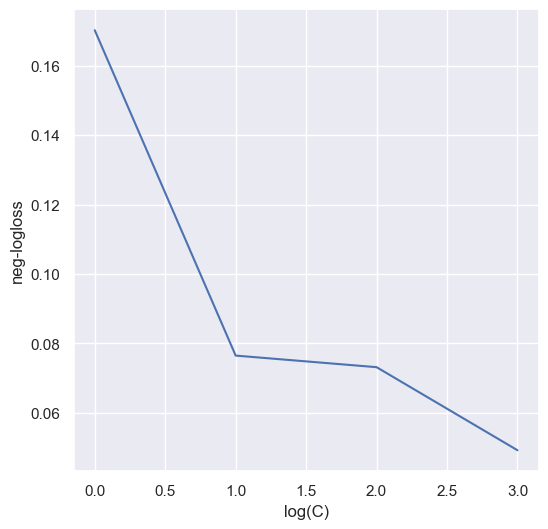

In [275]:
Cs = [1, 10,100,1000]
 
lrcv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1',solver='liblinear', multi_class='ovr')
lrcv_L2.fit(X_train, y_train)    
 
lrcv_L2.scores_
 
# dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
n_classes = 3
scores =  np.zeros((n_classes,n_Cs))
for j in range(n_classes):
        scores[j][:] = np.mean(lrcv_L2.scores_[label[j]],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
plt.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()

In [276]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

logistic_target = data['price_category']

def Logistic_Regression(label,features,method):
    model=LogisticRegression(random_state=0,penalty='l1',solver='liblinear', multi_class='ovr',C=1)
    x=features
    y=label
    
    # 十折交叉验证
    prediction=cross_val_predict(model,x,y,cv=10)
    acc=accuracy_score(prediction,y)
    precision=precision_score(prediction,y,average=method)
    recall=recall_score(prediction,y,average=method)
    f1=f1_score(prediction,y,average=method)
    return acc,precision,recall,f1

acc,precision,recall,f1 = Logistic_Regression(logistic_target,sig_data,'weighted')
print('------Weighted------')
print('Weighted acc', acc)
print('Weighted precision', precision)
print('Weighted recall', recall)
print('Weighted f1-score', f1)
acc,precision,recall,f1 = Logistic_Regression(logistic_target,sig_data,'macro')
print('------Macro------')
print('Macro acc', acc)
print('Macro precision', precision)
print('Macro recall', recall)
print('Macro f1-score', f1)
acc,precision,recall,f1 = Logistic_Regression(logistic_target,sig_data,'micro')
print('------Micro------')
print('Micro acc', acc)
print('Micro precision', precision)
print('Micro recall', recall)
print('Micro f1-score', f1)

------Weighted------
Weighted acc 0.9073170731707317
Weighted precision 0.9099623846911663
Weighted recall 0.9073170731707317
Weighted f1-score 0.9082133206447671
------Macro------
Macro acc 0.9073170731707317
Macro precision 0.8684822521419829
Macro recall 0.8942382024500759
Macro f1-score 0.8801260436737315
------Micro------
Micro acc 0.9073170731707317
Micro precision 0.9073170731707317
Micro recall 0.9073170731707317
Micro f1-score 0.9073170731707317
